In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_name = "./yzu.bmp"
origin_img = cv2.imread(file_name)
result_img = origin_img

### Print Image

In [3]:
def show_img(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

### Functions

旋轉

In [4]:
def rotate_img(val):
    global origin_img, result_img
    (h, w, d) = origin_img.shape # 讀取圖片大小
    center = (w // 2, h // 2) # 找到圖片中心
    
    # 取得旋轉矩陣
    M = cv2.getRotationMatrix2D(center, val, 1.0)
    print(val)
    
    result_img = cv2.warpAffine(origin_img, M, (w, h))
    cv2.imshow("Rotate Image", result_img)

擷取圓形

In [5]:
def crop_circle(radius):
    global origin_img
    (h, w, d) = origin_img.shape # 讀取圖片大小
    center = (w // 2, h // 2)

    # 產生 mask
    mask = np.zeros_like(origin_img)
    mask = cv2.circle(mask, center, radius, (255,255,255), -1)
    print("mask: ")
    show_img(mask)

    # 自己跟自己的圓形區域做 AND -> 圓形的自己 
    crop = cv2.bitwise_and(origin_img, origin_img, mask=mask)
    print("cropped image: ")
    show_img(crop)

### 主程式碼



建立要顯示圖片的視窗與滑桿

In [6]:
cv2.imshow("Rotate Image", result_img)
cv2.createTrackbar("degree", "Rotate Image", 0, 359, rotate_img)
keycode = cv2.waitKey(0)
cv2.destroyAllWindows()

result image

orgin image: 


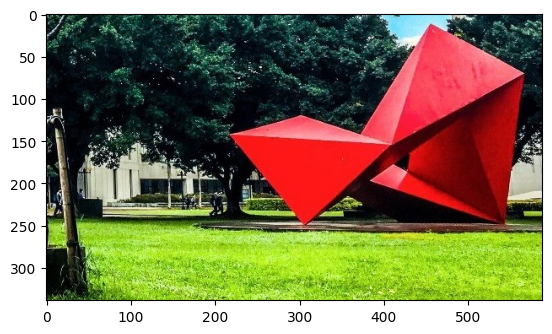

result image: 


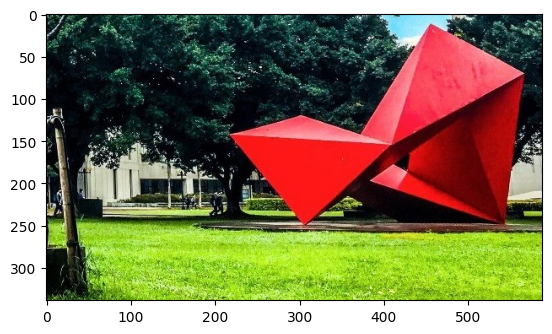

In [7]:
print("orgin image: ")
show_img(origin_img)
print("result image: ")
show_img(result_img)